In [1]:
import numpy as np 
from numpy import genfromtxt 
import matplotlib.pyplot as plt
from scipy import linalg 
import scipy.integrate as integrate 

In [2]:
def haar_wavelet(k,l): 
    k;l; 
    def haar_wavelet2(t):
        x = t*(2^k)-l 
        y = 0
        if x<0: 
            y = 0 
        elif x<1/2:
            y = 1 
        elif x<1: 
            y = -1 
        else: 
            y = 0 
        return (2^(k/2))*y
    return(haar_wavelet2)

In [3]:
def generate_kl(basis_length): 
    if basis_length>1:
        k_list = [] 
        l_list = [] 
        idx = 2 
        k = 0 
        while idx<=basis_length: 
            l = 0 
            while idx<=basis_length and l<=(2^k-1):
                k_list.append(k) 
                l_list.append(l) 
                l = l+1 
                idx = idx+1 
            k = k+1
        return [k_list,l_list]

In [4]:
def trig_real(n): 
    n; 
    def trig_real2(t): 
        if n%2 == 0: 
            return sqrt(2)*cos(2*pi*n*t) 
        else: 
            return sqrt(2)*sin(2*pi*n*t)
    return(trig_real2)

In [5]:
def generate_basis(basis_length, basis_type): 
    if basis_type == 'haar': 
        b0 = lambda t: 1
        b = [b0] 
        if basis_length>1:
            kl = generate_kl(basis_length) 
            for i in range(len(kl[1])):
                b.append(haar_wavelet(kl[0][i],kl[1][i]))
        return(b) 
    elif basis_type == 'trig_real': 
        b0 = lambda t: 1
        b = [b0] 
        if basis_length>1:
            n = 1 
            for j in range(1,basis_length): 
                b.append(trig_real(n))
                n += 1
        return b 
    elif basis_type == 'trig_complex': 
        return b

In [6]:
b6_haar = generate_basis(6, 'haar') 

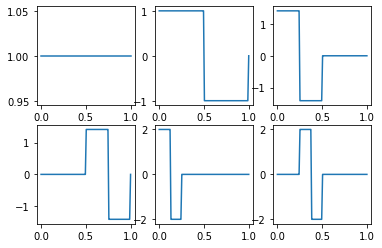

In [7]:
x = np.linspace(0,1,100)
  
y1 = [b6_haar[0](k) for k in x]
y2 = [b6_haar[1](k) for k in x]
y3 = [b6_haar[2](k) for k in x]
y4 = [b6_haar[3](k) for k in x]
y5 = [b6_haar[4](k) for k in x]
y6 = [b6_haar[5](k) for k in x]

figure, axis = plt.subplots(2, 3)
axis[0, 0].plot(x, y1)
axis[0, 1].plot(x, y2)
axis[0, 2].plot(x, y3)
axis[1, 0].plot(x, y4)
axis[1, 1].plot(x, y5)
axis[1, 2].plot(x, y6)
plt.show()

In [8]:
b6_trig_real = generate_basis(6, 'trig_real') 

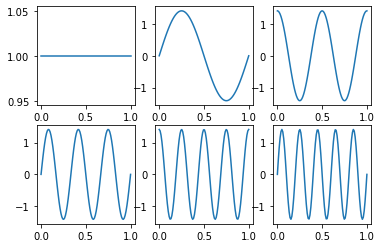

In [9]:
x = np.linspace(0,1,100)
  
y1 = [b6_trig_real[0](k) for k in x]
y2 = [b6_trig_real[1](k) for k in x]
y3 = [b6_trig_real[2](k) for k in x]
y4 = [b6_trig_real[3](k) for k in x]
y5 = [b6_trig_real[4](k) for k in x]
y6 = [b6_trig_real[5](k) for k in x]

figure, axis = plt.subplots(2, 3)
axis[0, 0].plot(x, y1)
axis[0, 1].plot(x, y2)
axis[0, 2].plot(x, y3)
axis[1, 0].plot(x, y4)
axis[1, 1].plot(x, y5)
axis[1, 2].plot(x, y6)
plt.show()

In [27]:
def int_rstieltjes(f, g, a, b, num_points=101): 
    n = num_points 
    points = np.linspace(a,b,n)
    int_approx = 0 
    for i in range(n-1):
        int_approx = int_approx + ((f(points[i])+f(points[i+1]))/2)*(g(points[i+1])-g(points[i])) 
    return int_approx

In [36]:
def int_rstieltjes2(f, g, tt): 
    n = len(tt)
    int_approx = 0 
    for i in range(n-1):
        int_approx = int_approx + ((f[i]+f[i+1])/2)*(g[i+1]-g[i]) 
    return int_approx

In [47]:
def volatility_est_proc1(basis,p,tt,b_est): 
    # N = len(tt)-1
    Q = [] 
    for i in range(p.shape[0]):
        Q.append([(p[i,l] - p[i,0] - integrate.quad(b_est,0,tt[l])[0])**2 for l in range(len(tt))])
    # q = [mean([Q[l][k] for l in range(p.shape[0])]) for k in range(len(tt))] 
    S_j_est = []
    for j in range(p.shape[0]):
        S_j_est.append([int_rstieltjes2([basis[l](tt[i]) for i in range(len(tt))],Q[j][:],tt) for l in range(len(basis))])
    sigma_squared_est = []
    for i in range(p.shape[0]):
        sigma_squared_est_Q = []
        for j in range(len(tt)): 
            aux_sum = 0 
            for k in range(len(basis)): 
                aux_sum = aux_sum + S_j_est[i][k] * basis[k](tt[j])
            sigma_squared_est_Q.append(aux_sum)
        sigma_squared_est.append(sigma_squared_est_Q)
    return {'S_j_est' : S_j_est, 'sigma_squared_est' : sigma_squared_est} 